# MLS National TV Lineup

Major League Soccer announced their [2018 national TV lineup](https://www.mlssoccer.com/post/2018/01/04/mls-unveils-2018-us-and-canada-national-broadcast-schedule) on Thursday, Jan. 4th. A quick scan of the lineup seemed heavy on Atlanta, Seattle, Portland and the L.A. and N.Y. teams, but it was hard to know for sure.

So I thought I would practice some analysis skills and take a look at the matchups, seeing who was favored.

Goals
- games by team
- breakdown by language
- Who is a home more

To Do
- This is not DRY. I need to turn the chart/table making into a function, which I could then feed the language table into it.
- Same with figuring out match dupes ... It is not effient ... it's just how I came to it.

Caveats
- The data was scraped using the Chrome Scraper tool, inserted into a [Google Spreadsheet and cleaned up](https://docs.google.com/spreadsheets/d/e/2PACX-1vT1wVvMBp-OBmOm0tDfc6LZuPoz6D8X7NppUkHn6O51-KoIqjA67S7E9SIjaT3Oo_HT73nEeUUaz_48/pubhtml), then  downloaded as CSV.

In [1]:
import agate
import leather
import warnings
warnings.filterwarnings('ignore')

In [2]:
raw = agate.Table.from_csv('../data/mlstv.csv')
print(raw)

| column    | data_type |
| --------- | --------- |
| Date Time | DateTime  |
| Date      | Date      |
| Match     | Text      |
| Network   | Text      |
| Spanish   | Boolean   |
| Home      | Text      |
| Visitor   | Text      |



In [3]:
# filtering for language

both = raw
english = raw.where(lambda r: r['Spanish'] is False)
spanish = raw.where(lambda r: r['Spanish'] is True)
print('len of both: {}'.format(len(both)))
print('len of english: {}'.format(len(english)))
print('len of spanish: {}'.format(len(spanish)))


len of both: 86
len of english: 61
len of spanish: 25


## All National TV

len of visitor: 86
len of home: 86
len of teams: 172

| team                   | Matches |
| ---------------------- | ------- |
| LAFC                   |      16 |
| Atlanta United         |      16 |
| New York City FC       |      14 |
| New York Red Bulls     |      14 |
| Seattle Sounders       |      13 |
| Orlando City SC        |      13 |
| LA Galaxy              |      13 |
| Portland Timbers       |      12 |
| D.C. United            |      12 |
| Sporting Kansas City   |       7 |
| FC Dallas              |       7 |
| Chicago Fire           |       7 |
| Houston Dynamo         |       6 |
| San Jose Earthquakes   |       5 |
| Toronto FC             |       4 |
| Philadelphia Union     |       3 |
| Columbus Crew SC       |       2 |
| Minnesota United FC    |       2 |
| New England Revolution |       2 |
| Real Salt Lake         |       2 |
| Colorado Rapids        |       2 |


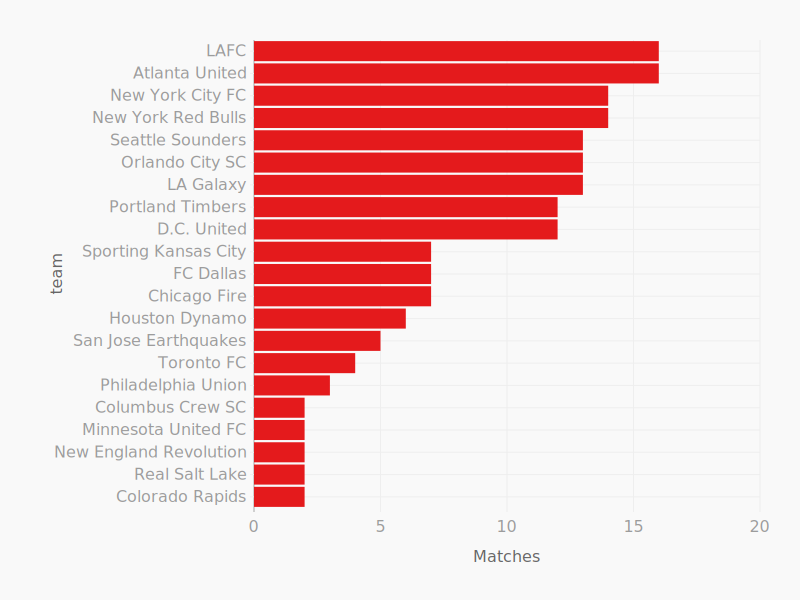

In [4]:
visitor = both.select(['Visitor', 'Date']).rename(column_names = ['team', 'date'])
home = both.select(['Home', 'Date']).rename(column_names = ['team', 'date'])
teams = agate.Table.merge([visitor, home])

print('len of visitor: {}'.format(len(visitor)))
print('len of home: {}'.format(len(home)))
print('len of teams: {}\n'.format(len(teams)))

teams_pivot = teams.pivot('team').rename(column_names = {'Count': 'Matches'})
teams_chart = teams_pivot.order_by('Matches', reverse=True)
teams_chart.print_table(max_rows=None, max_column_width=None)
teams_chart.bar_chart('team', 'Matches','../charts/all_tv.svg')
teams_chart.bar_chart('team', 'Matches')


## What it means

Atlanta is clearly the darling overall, and why not after hosting the [most-attended MLS game ever]() last year in the new Mercedes Benz stadium. A new team in L.A. helps build a natural big-city rivalry there to go along with the two New York teams.

## English language

len of en_visitor: 61
len of en_home: 61
len of en_teams: 122

| team                   | Matches |
| ---------------------- | ------- |
| Seattle Sounders       |      13 |
| LAFC                   |      12 |
| Atlanta United         |      12 |
| New York City FC       |      11 |
| Portland Timbers       |      11 |
| Orlando City SC        |      11 |
| New York Red Bulls     |      10 |
| LA Galaxy              |       9 |
| D.C. United            |       8 |
| Sporting Kansas City   |       7 |
| Toronto FC             |       4 |
| Columbus Crew SC       |       2 |
| Minnesota United FC    |       2 |
| Chicago Fire           |       2 |
| Philadelphia Union     |       2 |
| FC Dallas              |       1 |
| New England Revolution |       1 |
| Real Salt Lake         |       1 |
| Houston Dynamo         |       1 |
| San Jose Earthquakes   |       1 |
| Colorado Rapids        |       1 |


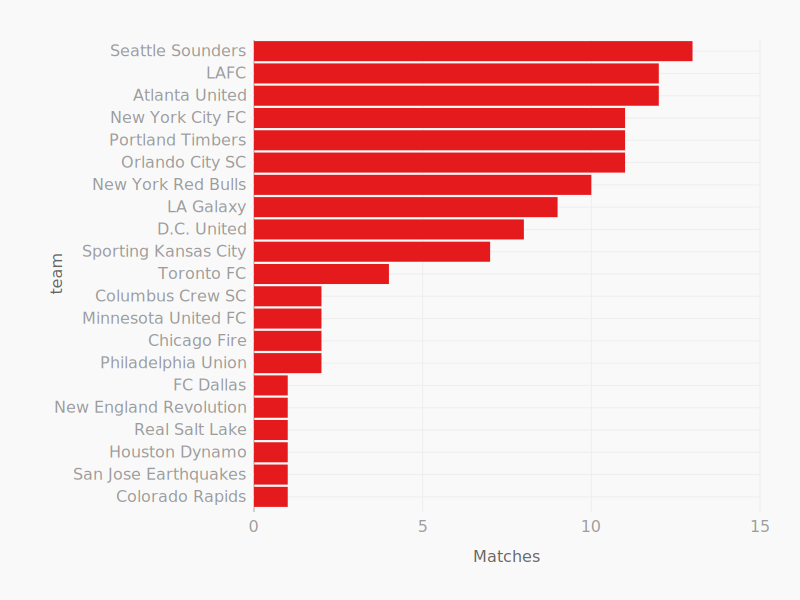

In [5]:
en_visitor = english.select(['Visitor', 'Date']).rename(column_names = ['team', 'date'])
en_home = english.select(['Home', 'Date']).rename(column_names = ['team', 'date'])
en_teams = agate.Table.merge([en_visitor, en_home])

print('len of en_visitor: {}'.format(len(en_visitor)))
print('len of en_home: {}'.format(len(en_home)))
print('len of en_teams: {}\n'.format(len(en_teams)))

en_teams_pivot = en_teams.pivot('team').rename(column_names = {'Count': 'Matches'})
en_teams_chart = en_teams_pivot.order_by('Matches', reverse=True)
en_teams_chart.print_table(max_rows=None, max_column_width=None)
en_teams_chart.bar_chart('team', 'Matches','../charts/en_tv.svg')
en_teams_chart.bar_chart('team', 'Matches')

## Spanish language

len of es_visitor: 25
len of es_home: 25
len of es_teams: 50

| team                   | Matches |
| ---------------------- | ------- |
| FC Dallas              |       6 |
| Houston Dynamo         |       5 |
| Chicago Fire           |       5 |
| Atlanta United         |       4 |
| LAFC                   |       4 |
| New York Red Bulls     |       4 |
| LA Galaxy              |       4 |
| D.C. United            |       4 |
| San Jose Earthquakes   |       4 |
| New York City FC       |       3 |
| Orlando City SC        |       2 |
| Portland Timbers       |       1 |
| New England Revolution |       1 |
| Real Salt Lake         |       1 |
| Philadelphia Union     |       1 |
| Colorado Rapids        |       1 |


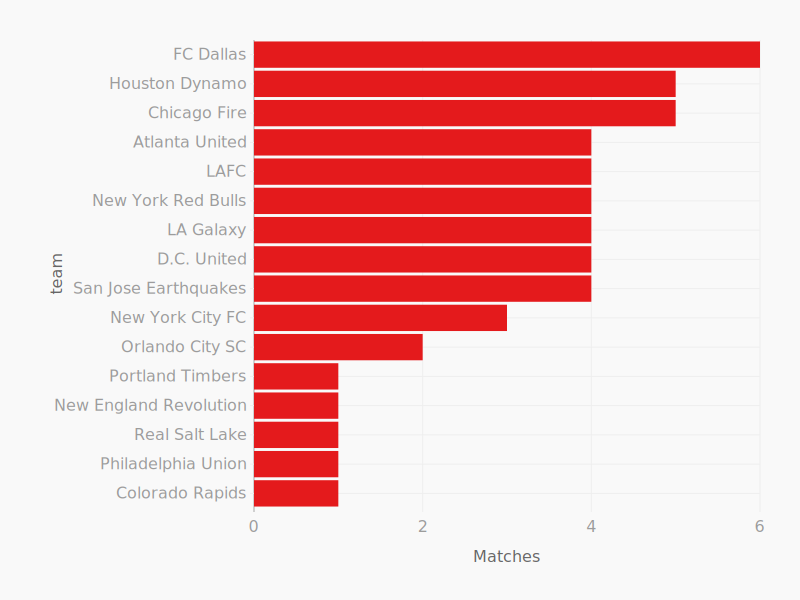

In [6]:
es_visitor = spanish.select(['Visitor', 'Date']).rename(column_names = ['team', 'date'])
es_home = spanish.select(['Home', 'Date']).rename(column_names = ['team', 'date'])
es_teams = agate.Table.merge([es_visitor, es_home])

print('len of es_visitor: {}'.format(len(es_visitor)))
print('len of es_home: {}'.format(len(es_home)))
print('len of es_teams: {}\n'.format(len(es_teams)))

es_teams_pivot = es_teams.pivot('team').rename(column_names = {'Count': 'Matches'})
es_teams_chart = es_teams_pivot.order_by('Matches', reverse=True)
es_teams_chart.print_table(max_rows=None, max_column_width=None)
es_teams_chart.bar_chart('team', 'Matches','../charts/es_tv.svg')
es_teams_chart.bar_chart('team', 'Matches')

In [7]:
la_darby = both.where(lambda row: row['Match'] in {
        'LA Galaxy vs. LAFC',
        'LAFC vs. LA Galaxy'}).order_by('Date')
la_darby.select(['Date', 'Match', 'Network', 'Spanish']).print_table(max_column_width=None)

|       Date | Match              | Network | Spanish |
| ---------- | ------------------ | ------- | ------- |
| 2018-03-31 | LA Galaxy vs. LAFC | FOX     |   False |
| 2018-07-26 | LAFC vs. LA Galaxy | ESPN    |   False |
| 2018-08-24 | LA Galaxy vs. LAFC | ESPN    |   False |


In [8]:
ny_darby = both.where(lambda row: row['Match'] in {
        'New York City FC vs. New York Red Bulls',
        'New York Red Bulls vs. New York City FC'}).order_by('Date')
ny_darby.select(['Date', 'Match', 'Network', 'Spanish']).print_table(max_column_width=None)

|       Date | Match                                   | Network | Spanish |
| ---------- | --------------------------------------- | ------- | ------- |
| 2018-05-05 | New York Red Bulls vs. New York City FC | ESPN    |   False |
| 2018-07-08 | New York City FC vs. New York Red Bulls | FS1     |   False |
| 2018-08-22 | New York City FC vs. New York Red Bulls | FS1     |   False |


## Who hosts the most?

Who hosts the most home games on National TV?

In [9]:
home_team_pivot = both.pivot('Home').rename(column_names = {'Count': 'Matches'}).order_by(
    'Matches',
    reverse=True
)
home_team_pivot.print_table()

| Home                 | Matches |
| -------------------- | ------- |
| Atlanta United       |      10 |
| LAFC                 |       8 |
| LA Galaxy            |       7 |
| New York Red Bulls   |       7 |
| Portland Timbers     |       6 |
| Seattle Sounders     |       6 |
| D.C. United          |       6 |
| Sporting Kansas City |       5 |
| Orlando City SC      |       5 |
| Chicago Fire         |       5 |
| New York City FC     |       4 |
| Toronto FC           |       3 |
| Philadelphia Union   |       3 |
| Houston Dynamo       |       3 |
| San Jose Earthquakes |       2 |
| Colorado Rapids      |       2 |
| FC Dallas            |       2 |
| Columbus Crew SC     |       1 |
| Real Salt Lake       |       1 |


In [10]:
# Hosting on English national TV
en_home_team_pivot = english.pivot('Home').rename(column_names = {'Count': 'Matches'}).order_by(
    'Matches',
    reverse=True
)
en_home_team_pivot.print_table()

| Home                 | Matches |
| -------------------- | ------- |
| Atlanta United       |       8 |
| LA Galaxy            |       6 |
| Portland Timbers     |       6 |
| LAFC                 |       6 |
| Seattle Sounders     |       6 |
| Sporting Kansas City |       5 |
| D.C. United          |       5 |
| Orlando City SC      |       4 |
| New York Red Bulls   |       4 |
| Toronto FC           |       3 |
| New York City FC     |       2 |
| Philadelphia Union   |       2 |
| Chicago Fire         |       1 |
| San Jose Earthquakes |       1 |
| Colorado Rapids      |       1 |
| Columbus Crew SC     |       1 |


In [15]:
# Hosting on English national TV
es_home_team_pivot = english.pivot('Home').rename(column_names = {'Count': 'Matches'}).order_by(
    'Matches',
    reverse=True
)
es_home_team_pivot.print_table()

| Home                 | Matches |
| -------------------- | ------- |
| Atlanta United       |       8 |
| LA Galaxy            |       6 |
| Portland Timbers     |       6 |
| LAFC                 |       6 |
| Seattle Sounders     |       6 |
| Sporting Kansas City |       5 |
| D.C. United          |       5 |
| Orlando City SC      |       4 |
| New York Red Bulls   |       4 |
| Toronto FC           |       3 |
| New York City FC     |       2 |
| Philadelphia Union   |       2 |
| Chicago Fire         |       1 |
| San Jose Earthquakes |       1 |
| Colorado Rapids      |       1 |
| Columbus Crew SC     |       1 |


## Does the same match appear on more than one network?

The answer is **NO**. This is not an efficient way to get at the answer, but it is there.

In [11]:
# this shows the number of matches that are both Spanish and English
# BUT **** dates are not included
matches_pivot = both.pivot('Match', 'Spanish')
matches_pivot.print_table(max_column_width=None, max_rows=None)

| Match                                        | False | True |
| -------------------------------------------- | ----- | ---- |
| Sporting Kansas City vs. New York City FC    |     1 |    0 |
| LA Galaxy vs. Portland Timbers               |     1 |    0 |
| LA Galaxy vs. LAFC                           |     2 |    0 |
| LA Galaxy vs. Sporting Kansas City           |     1 |    0 |
| Atlanta United vs. New York City FC          |     1 |    0 |
| Portland Timbers vs. New York City FC        |     1 |    0 |
| LAFC vs. Seattle Sounders                    |     1 |    0 |
| Toronto FC vs. Seattle Sounders              |     1 |    0 |
| Orlando City SC vs. Atlanta United           |     2 |    0 |
| LAFC vs. New York City FC                    |     1 |    0 |
| Portland Timbers vs. LAFC                    |     1 |    0 |
| Atlanta United vs. New York Red Bulls        |     1 |    0 |
| Sporting Kansas City vs. Columbus Crew SC    |     1 |    0 |
| Sporting Kansas City vs. Minnesota Uni

In [12]:
# this finds any matchup in the table above that falls in both spanish/english or more than one of the other.
more_matches = matches_pivot.where(
    lambda row: row['False'] > 1 or row['True'] > 1 or (row['True'] > 0 and row['False'] > 0)
)
more_matches.print_table(max_column_width=None)

more_matches_names = more_matches.columns['Match'].values_distinct()
print('\nlist of matches:\n')
print(more_matches_names)

| Match                                   | False | True |
| --------------------------------------- | ----- | ---- |
| LA Galaxy vs. LAFC                      |     2 |    0 |
| Orlando City SC vs. Atlanta United      |     2 |    0 |
| New York City FC vs. New York Red Bulls |     2 |    0 |
| Portland Timbers vs. Seattle Sounders   |     2 |    0 |
| Atlanta United vs. D.C. United          |     1 |    1 |

list of matches:

('Orlando City SC vs. Atlanta United', 'LA Galaxy vs. LAFC', 'Atlanta United vs. D.C. United', 'New York City FC vs. New York Red Bulls', 'Portland Timbers vs. Seattle Sounders')


In [13]:
# this takes that list of matchups above and prints out the details with dates, etc.
more_matches_details = both.where(lambda row: row['Match'] in more_matches_names)
match_details_ordered = more_matches_details.order_by('Match').order_by('Date')
match_details_ordered.select(['Date', 'Match', 'Network', 'Spanish']).print_table(max_column_width=None)

|       Date | Match                                   | Network   | Spanish |
| ---------- | --------------------------------------- | --------- | ------- |
| 2018-03-11 | Atlanta United vs. D.C. United          | ESPN      |   False |
| 2018-03-31 | LA Galaxy vs. LAFC                      | FOX       |   False |
| 2018-05-13 | Orlando City SC vs. Atlanta United      | FS1       |   False |
| 2018-05-13 | Portland Timbers vs. Seattle Sounders   | ESPN      |   False |
| 2018-07-08 | New York City FC vs. New York Red Bulls | FS1       |   False |
| 2018-07-21 | Atlanta United vs. D.C. United          | Univision |    True |
| 2018-08-22 | New York City FC vs. New York Red Bulls | FS1       |   False |
| 2018-08-24 | LA Galaxy vs. LAFC                      | ESPN      |   False |
| 2018-08-24 | Orlando City SC vs. Atlanta United      | ESPN      |   False |
| 2018-08-26 | Portland Timbers vs. Seattle Sounders   | FS1       |   False |


In [14]:
# one matchup was in both english and spanish, but they are different days.
both_es_en = matches_pivot.where(lambda row: row['False'] > 0 and row['True'] > 0)
both_es_en.print_table(max_column_width=None)
atl_dc = both.where(lambda row: row['Match'] == 'Atlanta United vs. D.C. United')
atl_dc.select(['Date', 'Match', 'Network', 'Spanish']).print_table(max_column_width=None)

| Match                          | False | True |
| ------------------------------ | ----- | ---- |
| Atlanta United vs. D.C. United |     1 |    1 |
|       Date | Match                          | Network   | Spanish |
| ---------- | ------------------------------ | --------- | ------- |
| 2018-03-11 | Atlanta United vs. D.C. United | ESPN      |   False |
| 2018-07-21 | Atlanta United vs. D.C. United | Univision |    True |
